In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import mpl_toolkits
import nltk
from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

***Importing the dataset***

In [2]:
yelp = pd.read_csv('yelp_dataset_final.csv', index_col = 0)

In [3]:
# Checking the first 5 rows of the data using .head()
yelp.head()

,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,business_open,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,True,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,True,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,True,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,True,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,True,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw


In [4]:
# Checking the last 5 rows of the data using .tail()
yelp.tail()

,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,business_open,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
229902,False,Gastropubs; Restaurants,Tempe,"1706 E Warner Rd\nSte 3\nTempe, AZ 85284",vnffHkFJbmd-J3OaBbK2Eg,33.334616,-111.912060,Spitfire Grill & Tavern,NaN,False,...,18,Lisa,82,user,111,2,I really wanted to like this place because it'...,review,0,6e7pZofhDuIlD_rX2oYirQ
229903,False,Hotels & Travel; Event Planning & Services; Ho...,Peoria,"27501 N Lake Pleasant Rd\nPeoria, AZ 85383",l5oUrgQ190l8CcN8uzd_pA,33.731766,-112.262864,Cibola Vista Resort,NaN,True,...,29,Jonquil,47,user,50,1,My husband I stayed here for two nights. Of c...,review,2,dDNfSFT0VApxPmURclX6_g
229904,False,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,"530 W Broadway\nTempe, AZ 85281",-EctXOb3B7T177jGYUhjVA,33.407561,-111.947525,Boulders On Broadway,NaN,True,...,2,Amanda,4,user,2,4,Cool atmosphere. A lot of beers on tap and goo...,review,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,False,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,"699 S Mill Ave\nTempe, AZ 85281",YQvg0JCGRFUkb6reMMf3Iw,33.423441,-111.939622,La Bocca Urban Pizzeria + Wine Bar,NaN,True,...,378,Valerie,196,user,678,3,I have to take a star off for the spotty servi...,review,2,jopndPrv-H5KW2CfScnw9A
229906,False,Churches; Religious Organizations,Phoenix,"15220 S 50th St\nSte 101\nPhoenix, AZ 85044",gKxOZvQTTd5hpFa3r5igGQ,33.307950,-111.976067,New Valley Church,NaN,True,...,5,Jeff,32,user,15,5,"So cool, yo.",review,0,mbRUG6h0Mgb2XIJvscIoMg


In [5]:
# Checking the shape of the data
yelp.shape

(229907, 31)

In [6]:
# Getting the names of all the columns
yelp.columns

Index(['business_blank', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_neighborhoods',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'business_type', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful',
       'user_id'],
      dtype='object')

In [7]:
# getting a concise summary of the DataFrame
yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229907 entries, 0 to 229906
Data columns (total 31 columns):
business_blank            229907 non-null bool
business_categories       229130 non-null object
business_city             229907 non-null object
business_full_address     229907 non-null object
business_id               229907 non-null object
business_latitude         229907 non-null float64
business_longitude        229907 non-null float64
business_name             229907 non-null object
business_neighborhoods    0 non-null float64
business_open             229907 non-null bool
business_review_count     229907 non-null int64
business_stars            229907 non-null float64
business_state            229907 non-null object
business_type             229907 non-null object
cool                      229907 non-null int64
date                      229907 non-null object
funny                     229907 non-null int64
review_id                 229907 non-null object
reviewer_averag

In [8]:
# generating a descriptive statistics of the dataset
yelp.describe().T

,count,mean,std,min,25%,50%,75%,max
business_latitude,229907.0,33.485976,0.109553,32.876848,33.422543,33.492985,33.538927,34.002867
business_longitude,229907.0,-111.985018,0.125656,-112.875482,-112.066300,-111.964558,-111.922262,-111.263508
business_neighborhoods,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_review_count,229907.0,113.394199,141.763461,3.000000,21.000000,64.000000,145.000000,862.000000
business_stars,229907.0,3.776120,0.594391,1.000000,3.500000,4.000000,4.000000,5.000000
cool,229907.0,0.868234,1.943242,0.000000,0.000000,0.000000,1.000000,117.000000
funny,229907.0,0.699030,1.863522,0.000000,0.000000,0.000000,1.000000,70.000000
reviewer_average_stars,229907.0,3.527542,1.066568,0.000000,3.430000,3.750000,4.020000,5.000000
reviewer_cool,229907.0,246.295415,915.875702,0.000000,2.000000,15.000000,102.000000,22410.000000
reviewer_funny,229907.0,200.039177,758.736983,0.000000,1.000000,12.000000,79.000000,24519.000000


## Cleaning of dataset

***Null value treatment***

In [9]:
null_columns=yelp.columns[yelp.isnull().any()]
yelp[null_columns].isnull().sum()

business_categories          777
business_neighborhoods    229907
reviewer_name              14028
text                           6
dtype: int64

In [10]:
# Dropping the whole 'business_neighborhoods' column
yelp.drop('business_neighborhoods', axis=1, inplace = True)

In [11]:
# Dropping the remaining rows with null values as "business_categories" column has 0.33% and "text" column has 0.002% null rows out of total

yelp.dropna(axis=0, inplace = True)

***Checking the number of unique values in each column so as to drop the unnecessary columns***

In [12]:
temp ={}
for i in yelp:
    temp[i]=len(yelp[i].unique())
temp

{'business_blank': 1,
 'business_categories': 2059,
 'business_city': 61,
 'business_full_address': 10182,
 'business_id': 11358,
 'business_latitude': 8813,
 'business_longitude': 8819,
 'business_name': 8183,
 'business_open': 2,
 'business_review_count': 293,
 'business_stars': 9,
 'business_state': 4,
 'business_type': 1,
 'cool': 52,
 'date': 2497,
 'funny': 49,
 'review_id': 215168,
 'reviewer_average_stars': 331,
 'reviewer_blank': 1,
 'reviewer_cool': 1116,
 'reviewer_funny': 1027,
 'reviewer_name': 8308,
 'reviewer_review_count': 853,
 'reviewer_type': 1,
 'reviewer_useful': 1329,
 'stars': 5,
 'text': 214944,
 'type': 1,
 'useful': 51,
 'user_id': 43762}

In [13]:
# From the above count of unique values in each column, we first drop the columns with only 1 unique value
yelp.drop(['business_blank','business_type','reviewer_type','type'],axis=1,inplace=True)

# Also if we check, there are a few more columns which does not infer any meaning and also some of them are redundant. So we drop them as well
yelp.drop(['business_name','cool', 'funny', 'reviewer_name', 'useful'],axis=1,inplace=True)

In [14]:
#checking the number of business in each state
yelp.business_state.value_counts()

AZ    215152
CA         6
CO         5
SC         5
Name: business_state, dtype: int64

In [15]:
# Here we see that except Arizona(AZ), the other 3 states just have 16 businesses in total. So we remove the other 3 cities
yelp.drop(yelp[yelp.business_state!='AZ'].index,inplace=True)

In [16]:
# Checking the new shape of our data after all the data cleaning
yelp.shape

(215152, 21)

# Exploratory Data Analysis (EDA)

## Feature Engineering

***Fetching wordcount and character count for each review***

In [17]:
yelp['word_count'] = yelp['text'].apply(lambda x: len(str(x).split(" ")))
yelp[['text','word_count']].head()

,text,word_count
0,My wife took me here on my birthday for breakf...,160
1,I have no idea why some people give bad review...,256
2,love the gyro plate. Rice is so good and I als...,16
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75
4,General Manager Scott Petello is a good egg!!!...,85


In [18]:
# Calculate character count for each review
yelp['char_count'] = yelp['text'].str.len()
yelp[['text','word_count','char_count']].head()

,text,word_count,char_count
0,My wife took me here on my birthday for breakf...,160,889
1,I have no idea why some people give bad review...,256,1345
2,love the gyro plate. Rice is so good and I als...,16,76
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75,419
4,General Manager Scott Petello is a good egg!!!...,85,469


In [19]:
# Descriptive statistics of word counts
yelp.word_count.describe()

count    215152.000000
mean        132.535161
std         115.709296
min           1.000000
25%          54.000000
50%         101.000000
75%         175.000000
max        1028.000000
Name: word_count, dtype: float64

In [20]:
# Descriptive statistics of character counts
yelp.char_count.describe()

count    215152.000000
mean        708.292133
std         620.322921
min           1.000000
25%         287.000000
50%         539.000000
75%         934.000000
max        5000.000000
Name: char_count, dtype: float64

***Categorizing businessess based on words present in business_categories***

In [21]:
cat = []
for x in yelp.business_categories:
    if  'pets' in x.lower():
        cat.append('Pets')
    elif  'religious' in x.lower():
        cat.append('Religious Org')
    elif  'school' in x.lower() or 'university' in x.lower() or 'education' in x.lower():
        cat.append('Education')
    elif  'gym' in x.lower() or 'fitness' in x.lower() or 'yoga' in x.lower():
        cat.append('Fitness')
    elif  'bars' in x.lower() or 'nightlife' in x.lower() or 'entertainment' in x.lower() or 'beer' in x.lower():
        cat.append('Bars')
    elif 'restaurants' in x.lower() or'smoothies' in x.lower() or'bakeries' in x.lower() or'coffee' in x.lower():
        cat.append('Restaurant')
    elif  'clothing' in x.lower() or'shopping' in x.lower() or'grocery' in x.lower() or 'store' in x.lower():
        cat. append('Shopping')
    elif 'automotive' in x.lower():
        cat.append('Automotive')
    elif 'spa' in x.lower():
        cat.append('Spa')
    elif 'service' in x.lower():
        cat.append('Service')
    elif 'parks' in x.lower() or  'lakes' in x.lower() or 'zoo' in x.lower() or 'pools' in x.lower():
        cat.append('Parks')
    elif 'travel' in x.lower():
        cat.append('Travel')
    elif 'Medical' in x.lower() or 'health' in x.lower():
        cat.append('Medical')
    elif 'food' in x.lower():
        cat.append('Other Foods')
    elif 'active life' in x.lower():
        cat.append('Active Life')
    
    else:
        cat.append('Others')

In [22]:
# Assigning Cateegories to new Column
yelp['new_categories'] = cat
yelp[['business_categories','new_categories']].head(10)

,business_categories,new_categories
0,Breakfast & Brunch; Restaurants,Restaurant
1,Italian; Pizza; Restaurants,Restaurant
2,Middle Eastern; Restaurants,Restaurant
3,Active Life; Dog Parks; Parks,Parks
4,Tires; Automotive,Automotive
5,Wine Bars; Bars; American (New); Nightlife; Re...,Bars
6,Mexican; Restaurants,Restaurant
7,Hotels & Travel; Airports,Travel
8,Sushi Bars; Restaurants,Bars
9,Food; Tea Rooms; Japanese; Restaurants,Restaurant


In [23]:
# Checking number of business in each newly created categories
yelp.new_categories.value_counts()

Restaurant       126852
Bars              41465
Shopping          15169
Service            7454
Other Foods        5908
Spa                5111
Automotive         2784
Fitness            1838
Medical            1796
Travel             1782
Parks              1588
Pets               1442
Active Life         958
Education           492
Others              411
Religious Org       102
Name: new_categories, dtype: int64

## Visualizations and insights

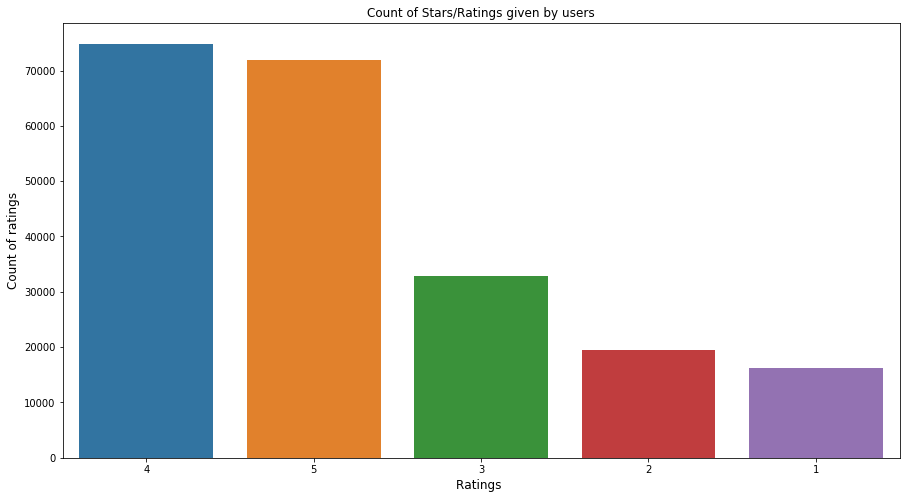

In [24]:
# visualising the count of star distribution given by users

plt.figure(figsize=(15,8))
sns.countplot('stars', data=yelp ,order = yelp['stars'].value_counts().index)
plt.title("Count of Stars/Ratings given by users")
plt.xlabel('Ratings ', fontsize=12)
plt.ylabel('Count of ratings', fontsize=12)
plt.show()

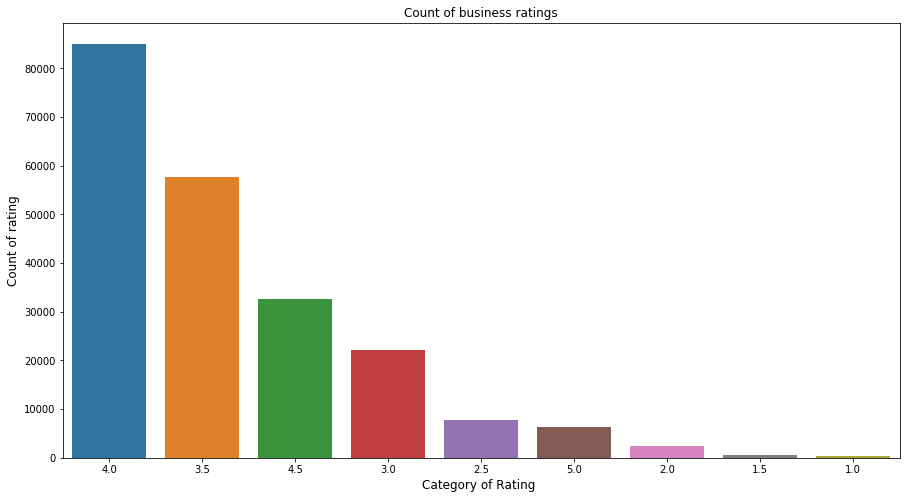

In [25]:
# visualising the count of business ratings 

plt.figure(figsize=(15,8))
sns.countplot('business_stars', data=yelp ,order = yelp['business_stars'].value_counts().index)
plt.title("Count of business ratings")
plt.xlabel('Category of Rating ', fontsize=12)
plt.ylabel('Count of rating', fontsize=12)
plt.show()

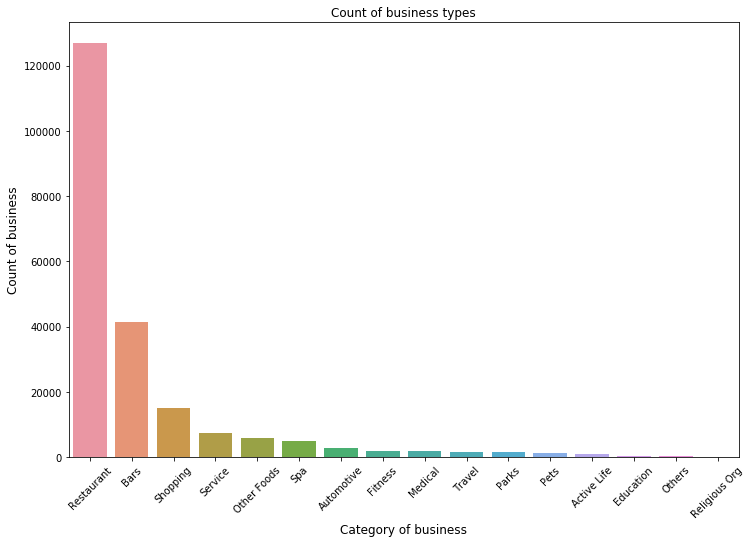

In [26]:
# visualising the count of business categories bsed on the newly created column "new_categories"

plt.figure(figsize=(12,8))
sns.countplot('new_categories', data=yelp,order = yelp['new_categories'].value_counts().index)
plt.title("Count of business types")
plt.xlabel('Category of business', fontsize=12)
plt.ylabel('Count of business', fontsize=12)
plt.xticks(rotation=45)
plt.show()

***Average stars based on new_categories***

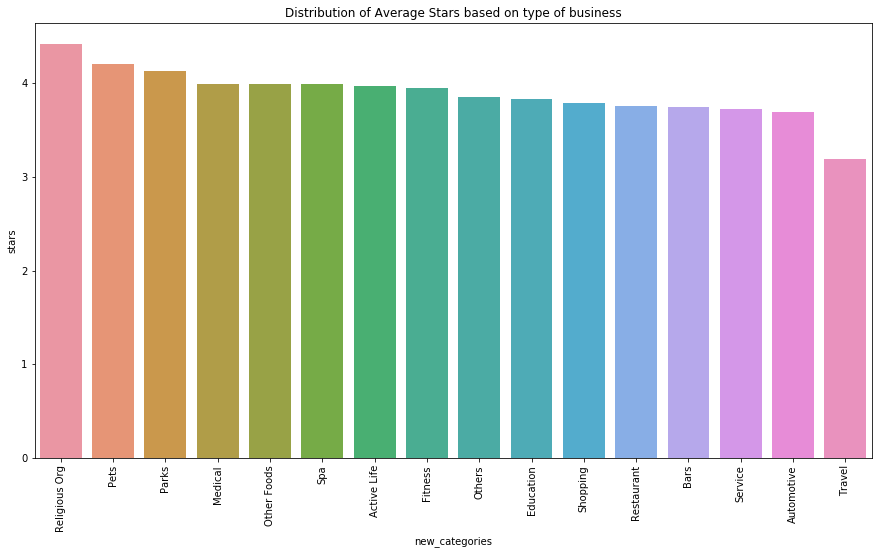

In [27]:
business_types = yelp.groupby('new_categories')[['stars']].mean().sort_values(by = 'stars',ascending=False)


business_types.reset_index(inplace=True)
business_types = pd.DataFrame(business_types)
plt.figure(figsize=(15,8))
sns.barplot('new_categories', 'stars', data = business_types)
plt.title('Distribution of Average Stars based on type of business')
plt.xticks(rotation=90)
plt.show()

***Top 15 cities by businesses listed***

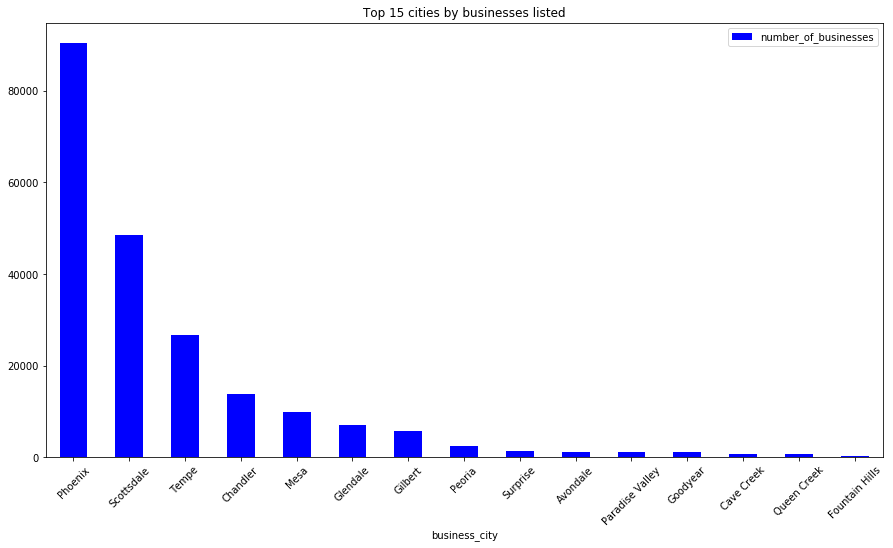

In [28]:
city_business_counts = yelp[['business_city', 'business_id']].groupby(['business_city'])['business_id'].agg('count').sort_values(ascending=False)
city_business_counts = pd.DataFrame(data=city_business_counts)
city_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)
city_business_counts[0:15].sort_values(by="number_of_businesses", ascending=False).plot(kind='bar', stacked=False, figsize=[15,8], colormap='winter')
plt.title('Top 15 cities by businesses listed')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

***Top 15 cities based on reviews***

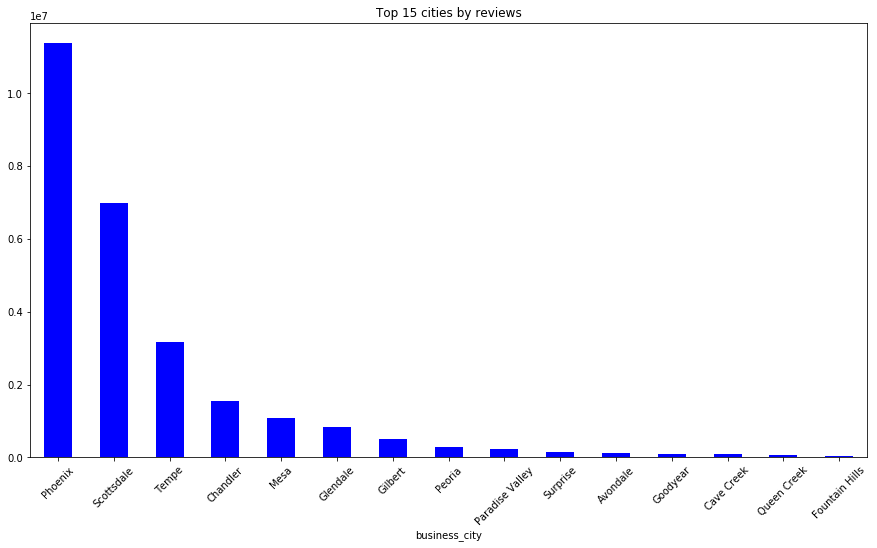

In [29]:
city_business_reviews = yelp[['business_city', 'reviewer_review_count', 'business_stars','stars']].groupby(['business_city']).agg({'reviewer_review_count': 'sum', 'business_stars': 'mean','stars': 'mean'}).sort_values(by='reviewer_review_count', ascending=False)
city_business_reviews['reviewer_review_count'][0:15].plot(kind='bar', stacked=False, figsize=[15,8],colormap='winter')
plt.title('Top 15 cities by reviews')
plt.xticks(rotation=45)
plt.show()

***Cities with greater than 50k reviews ranked by average stars***

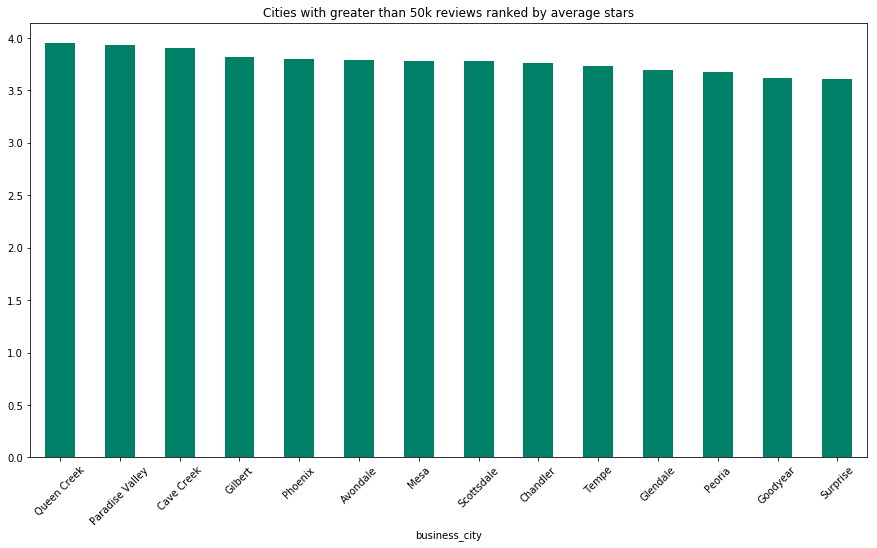

In [30]:
city_business_reviews[city_business_reviews.reviewer_review_count > 50000]['stars'].sort_values(ascending=False).plot(kind='bar', stacked=False, figsize=[15,8], colormap='summer')
plt.title('Cities with greater than 50k reviews ranked by average stars')
plt.xticks(rotation=45)
plt.show()

***Checking the trend of review count based on days of a week***

In [31]:
yelp['date'] =pd.to_datetime(yelp['date'],format='%Y-%m-%d')
yelp['day_name'] = yelp.apply(lambda row: row.date.strftime("%A"),axis=1)

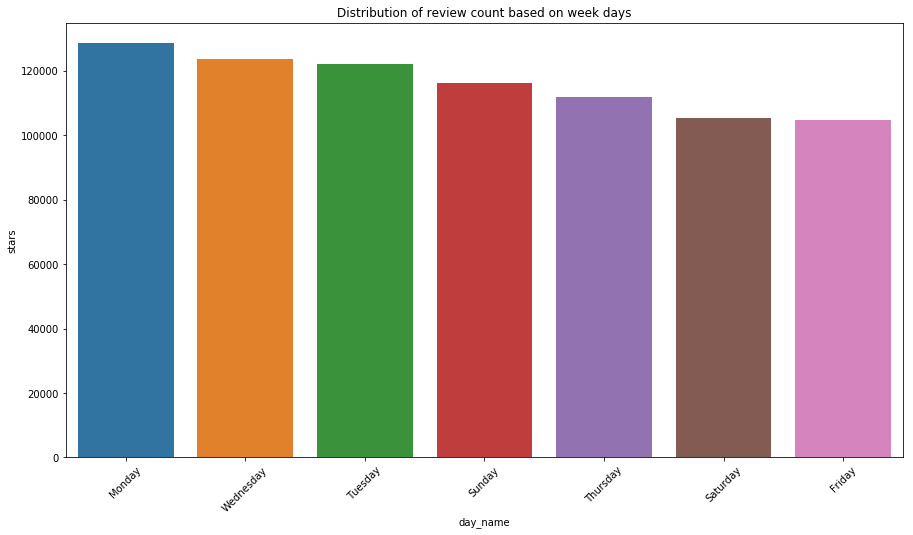

In [32]:
ratings_day = yelp[['day_name','stars']].groupby(['day_name']).agg({'stars': 'sum'}).sort_values(by='stars', ascending=False)
ratings_day.reset_index(inplace=True)
ratings_day = pd.DataFrame(ratings_day)
plt.figure(figsize=(15,8))
sns.barplot('day_name', 'stars', data = ratings_day)
plt.title('Distribution of review count based on week days')
plt.xticks(rotation=45)
plt.show()

***Checking the trend of review stars based on year***

In [33]:
yelp['year'] = yelp.apply(lambda row: row.date.year,axis=1)

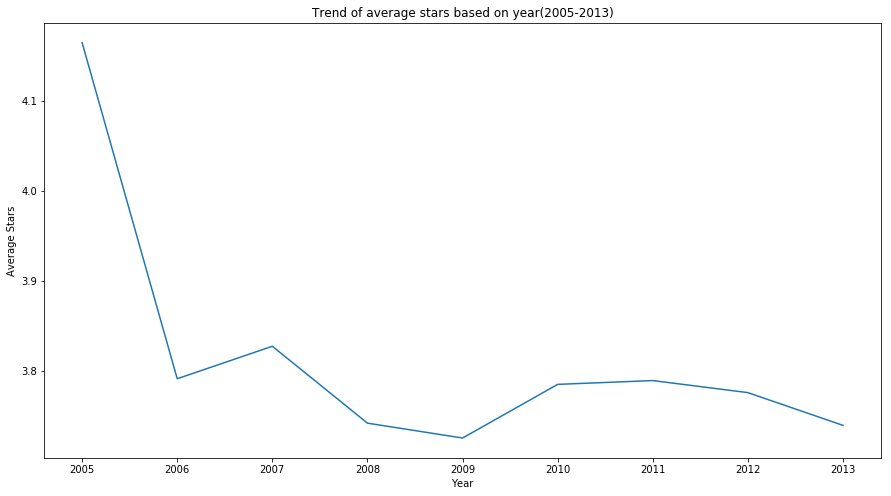

In [37]:
plt.figure(figsize=(15,8))
yelp.groupby('year')['stars'].mean().plot(kind='line')
plt.title('Trend of average stars based on year(2005-2013)')
plt.xlabel('Year')
plt.ylabel('Average Stars')
plt.show()

***Looking the trend of business count based on year***

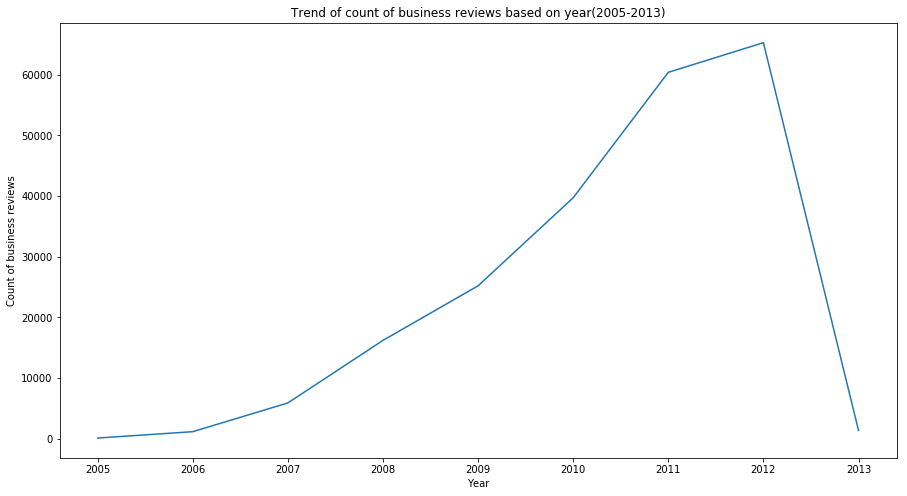

In [38]:
plt.figure(figsize=(15,8))
yelp.groupby('year')['reviewer_review_count'].count().plot(kind='line')
plt.title('Trend of count of business reviews based on year(2005-2013)')
plt.xlabel('Year')
plt.ylabel('Count of business reviews')
plt.show()

***Business category ranking based on review count***

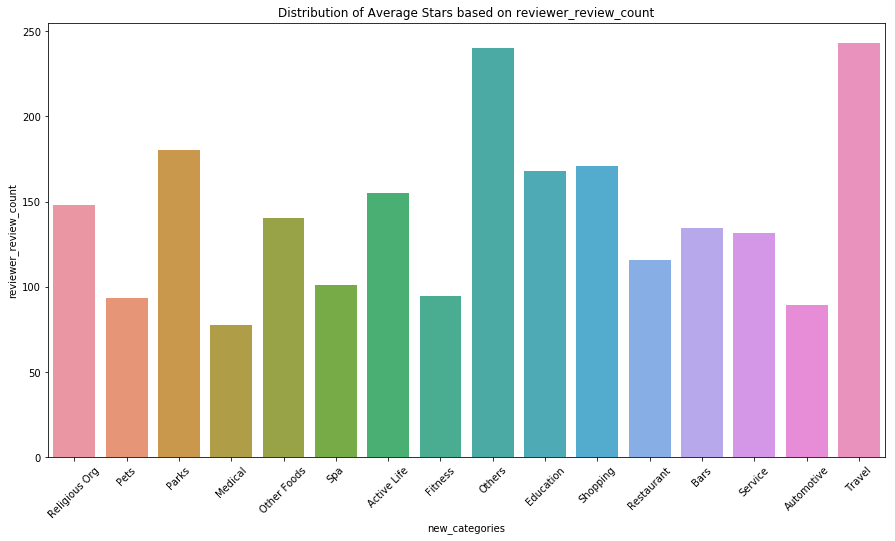

In [39]:
business_types_count = yelp.groupby('new_categories')[['reviewer_review_count', 'stars']].mean().sort_values(by = 'stars',ascending=False)


business_types_count.reset_index(inplace=True)
business_types = pd.DataFrame(business_types_count)
plt.figure(figsize=(15,8))
sns.barplot('new_categories', 'reviewer_review_count', data = business_types_count)
plt.title('Distribution of Average Stars based on reviewer_review_count')
plt.xticks(rotation=45)
plt.show()

Seaborn’s FaceGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created 'char_count' feature and the stars rating.

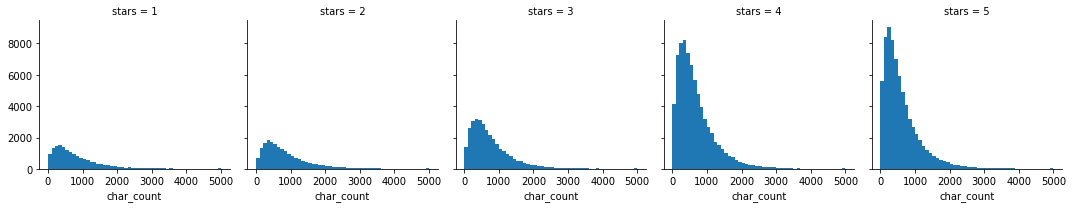

In [41]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'char_count', bins=50)
plt.show()

***We create a box plot of the 'char_length' for each star rating***

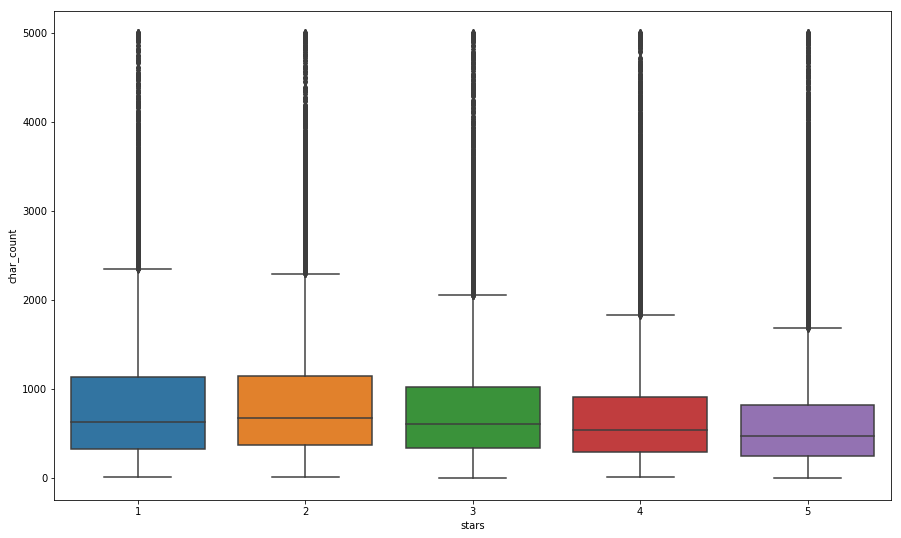

In [42]:
plt.figure(figsize=(15,9))
sns.boxplot(x='stars', y='char_count', data=yelp)
plt.show()

***Lets get the overview of reviews.***

In [43]:
useful_reviews = len(yelp[yelp["reviewer_useful"]>0])
cool_reviews = len(yelp[yelp["reviewer_cool"]>0])
funny_reviews = len(yelp[yelp["reviewer_funny"]>0])
negative_reviws = len(yelp[yelp["stars"]<2])
positive_reviews =len(yelp[yelp["stars"]>3])
total_reviews = len(yelp)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 215152
Useful reviews: 207227
Funny reviews: 186958
Cool reviews: 189867
Total negative reviews: 16233
Total positive reviews: 146692


***Top reviewed business***

In [44]:
top_reviewed = yelp[yelp["stars"]>3]
top_reviews_dict ={}

for business_name in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_name] =top_reviews_dict[business_name]+1
    except:
        top_reviews_dict[business_name]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)
topbusiness.head()

,business_id,rated
0,9yKzy9PApeiPPOUJEtnvkg,78
1,ZRJwVLyzEJq1VAihDhYiow,74
2,6oRAC4uyJCsJl1X0WZpVSA,211
3,_1QQZuf4zZOyFCvXc0o6Vg,69
4,6ozycU1RpktNG2-1BroVtw,4


***getting the 'quality of reviewer' by making 5 bins based on count of reviews***

In [45]:
user_importance = yelp.groupby('user_id')[['reviewer_review_count','reviewer_average_stars']].mean().sort_values(by = 'reviewer_review_count',ascending=False)
user_importance.reset_index(inplace=True)
user_importance = pd.DataFrame(user_importance)
user_importance.head()

,user_id,reviewer_review_count,reviewer_average_stars
0,AIVQg9enGug5woxehjmlGg,5807,3.77
1,6HBnx7fTfFlpWyez_P55xA,2848,3.63
2,7FuLnS_-b79GG-33mwLaMg,2810,3.64
3,lxZSVeJz6KEBW1nlA3JKJg,2760,3.84
4,qbfQRHLvZk5WSkKY0l_lMw,2587,3.87


In [46]:
listn=[]
for i in user_importance.reviewer_review_count:
    if i < 501:
        listn.append('0-500')
    elif i < 1001:
        listn.append('501-1000')
    elif i < 1501:
        listn.append('1001-1500')
    elif i < 2001:
        listn.append('1501-2000')
    else:
        listn.append('> 2000')

In [47]:
user_importance['class_review_count'] = listn
user_importance.head()

,user_id,reviewer_review_count,reviewer_average_stars,class_review_count
0,AIVQg9enGug5woxehjmlGg,5807,3.77,> 2000
1,6HBnx7fTfFlpWyez_P55xA,2848,3.63,> 2000
2,7FuLnS_-b79GG-33mwLaMg,2810,3.64,> 2000
3,lxZSVeJz6KEBW1nlA3JKJg,2760,3.84,> 2000
4,qbfQRHLvZk5WSkKY0l_lMw,2587,3.87,> 2000


In [48]:
user_importance.class_review_count.value_counts()

0-500        43241
501-1000       397
1001-1500       74
1501-2000       26
> 2000          12
Name: class_review_count, dtype: int64

In [49]:
user_importance.groupby('class_review_count')['reviewer_review_count','reviewer_average_stars'].mean().sort_values(by='reviewer_average_stars', ascending=False).reset_index()

,class_review_count,reviewer_review_count,reviewer_average_stars
0,0-500,29.490530,3.745574
1,501-1000,658.914358,3.718489
2,1001-1500,1201.405405,3.704730
3,1501-2000,1686.615385,3.696154
4,> 2000,2665.333333,3.680833


***Creating a wordcloud for all the reviews***

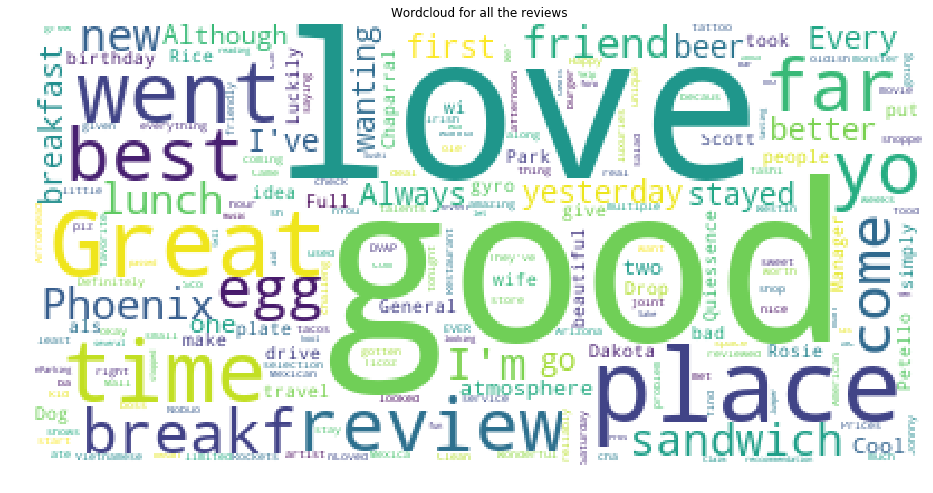

In [50]:
# Word cloud for all reviews
text =yelp.text
plt.figure(figsize=(16,10))
stopwords = nltk.corpus.stopwords.words('english')
wordcloud = WordCloud(background_color='white',
                      stopwords = stopwords).generate(str(text))


plt.imshow(wordcloud)
plt.title('Wordcloud for all the reviews')
plt.axis('off');

***Getting wordclouds for extreme ratings i.e 1 and 5***

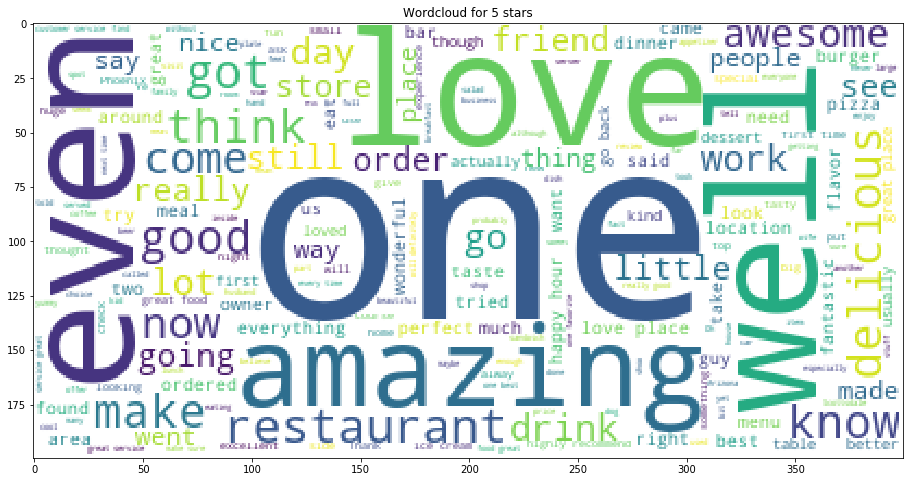

In [51]:
#WordCloud for review text with 5 star
yelp_best = yelp[yelp.stars ==5]

plt.figure(figsize=(16,8))
text = ' '.join(yelp_best['text'])
wc = WordCloud(background_color='white').generate(text)
plt.title('Wordcloud for 5 stars')
plt.imshow(wc)
plt.show()

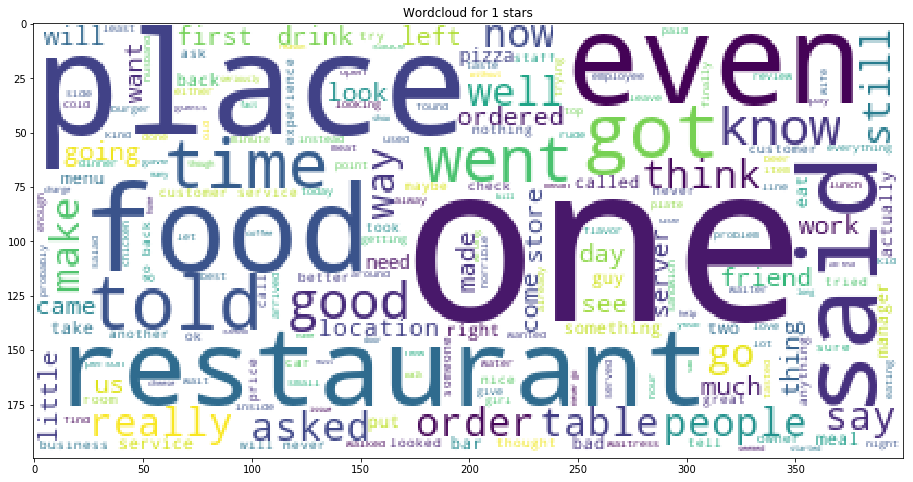

In [52]:
#WordCloud for review text with 1 star
yelp_best = yelp[yelp.stars ==1]

plt.figure(figsize=(16,8))
text = ' '.join(yelp_best['text'])
wc = WordCloud(background_color='white').generate(text)
plt.title('Wordcloud for 1 stars')
plt.imshow(wc)
plt.show()

# Modelling

***Text preprocessing of the 'text' column for modelling***

In [53]:
# Import stopwords
from nltk.corpus import stopwords
# Calculate number of stop words in each review text
stop_words = stopwords.words('english')
yelp['stopword_count'] = yelp['text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
yelp[['text','word_count','stopword_count']].head()

,text,word_count,stopword_count
0,My wife took me here on my birthday for breakf...,160,59
1,I have no idea why some people give bad review...,256,114
2,love the gyro plate. Rice is so good and I als...,16,5
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75,28
4,General Manager Scott Petello is a good egg!!!...,85,40


In [54]:
# Lower case all words
yelp['review_lower'] = yelp['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
yelp[['text','word_count','stopword_count','review_lower']].head()

,text,word_count,stopword_count,review_lower
0,My wife took me here on my birthday for breakf...,160,59,my wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...,256,114,i have no idea why some people give bad review...
2,love the gyro plate. Rice is so good and I als...,16,5,love the gyro plate. rice is so good and i als...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75,28,"rosie, dakota, and i love chaparral dog park!!..."
4,General Manager Scott Petello is a good egg!!!...,85,40,general manager scott petello is a good egg!!!...


In [55]:
# Remove Punctuation
yelp['review_nopunc'] = yelp['review_lower'].str.replace('[^a-z0-9 ]', '')
yelp[['text','word_count','stopword_count','review_lower','review_nopunc']].head()

,text,word_count,stopword_count,review_lower,review_nopunc
0,My wife took me here on my birthday for breakf...,160,59,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...,256,114,i have no idea why some people give bad review...,i have no idea why some people give bad review...
2,love the gyro plate. Rice is so good and I als...,16,5,love the gyro plate. rice is so good and i als...,love the gyro plate rice is so good and i also...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75,28,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...
4,General Manager Scott Petello is a good egg!!!...,85,40,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...


In [56]:
# Import stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# Remove Stopwords
yelp['review_nopunc_nostop'] = yelp['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
yelp[['text','word_count','stopword_count','review_lower','review_nopunc','review_nopunc_nostop']].head()

,text,word_count,stopword_count,review_lower,review_nopunc,review_nopunc_nostop
0,My wife took me here on my birthday for breakf...,160,59,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...
1,I have no idea why some people give bad review...,256,114,i have no idea why some people give bad review...,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...
2,love the gyro plate. Rice is so good and I als...,16,5,love the gyro plate. rice is so good and i als...,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75,28,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...
4,General Manager Scott Petello is a good egg!!!...,85,40,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...


In [57]:
# Identify top 30 common words
freq = pd.Series(' '.join(yelp['text']).split()).value_counts()[:30]
ff =freq.index.tolist()

In [58]:
other_stopwords = ['place','food','restaurant','went','one','go','really',\
                   'would','service','also',"i'm","i've",'us','ordered',\
                   'much','get', 'us', 'see', 'use', 'said', 'asked', 'day', 'go', \
                   'even', 'ive', 'right', 'left', 'always', 'would', 'told', \
                   'get', 'us', 'would', 'get', 'one', 'ive', 'go', 'even', \
                   'also', 'ever', 'x', 'take', 'let','goes' ]

In [59]:
# here to combine all of our stopwords including the inbuilt ones and also our custom identified common words
other_stopwords.extend(ff)
other_stopwords.extend(stop_words)

In [60]:
# removing inbuilt stopwords as well as custom stopwords
yelp['review_nopunc_nostop_nocommon'] = yelp['review_nopunc_nostop'].apply(lambda x: "".join(" ".join(x for x in x.split() if x not in other_stopwords)))
yelp[['text','word_count','stopword_count','review_lower','review_nopunc','review_nopunc_nostop','review_nopunc_nostop_nocommon']].head()

,text,word_count,stopword_count,review_lower,review_nopunc,review_nopunc_nostop,review_nopunc_nostop_nocommon
0,My wife took me here on my birthday for breakf...,160,59,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,wife took birthday breakfast excellent weather...
1,I have no idea why some people give bad review...,256,114,i have no idea why some people give bad review...,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...,idea people give bad reviews show please every...
2,love the gyro plate. Rice is so good and I als...,16,5,love the gyro plate. rice is so good and i als...,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...,love gyro plate rice good dig candy selection
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75,28,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...,rosie dakota love chaparral dog park convenien...
4,General Manager Scott Petello is a good egg!!!...,85,40,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...,general manager scott petello good egg detail ...


***Lemmatization***

In [61]:
from textblob import Word

In [63]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DEBASHIS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
yelp['cleaned_review'] = yelp['review_nopunc_nostop_nocommon'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
yelp.head()

,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_open,business_review_count,business_stars,business_state,...,char_count,new_categories,day_name,year,stopword_count,review_lower,review_nopunc,review_nopunc_nostop,review_nopunc_nostop_nocommon,cleaned_review
0,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,True,116,4.0,AZ,...,889,Restaurant,Wednesday,2011,59,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,wife took birthday breakfast excellent weather...,wife took birthday breakfast excellent weather...
1,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,True,102,4.0,AZ,...,1345,Restaurant,Wednesday,2011,114,i have no idea why some people give bad review...,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...,idea people give bad reviews show please every...,idea people give bad review show please everyo...
2,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,True,265,4.5,AZ,...,76,Restaurant,Thursday,2012,5,love the gyro plate. rice is so good and i als...,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...,love gyro plate rice good dig candy selection,love gyro plate rice good dig candy selection
3,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,True,88,4.5,AZ,...,419,Parks,Thursday,2010,28,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...,rosie dakota love chaparral dog park convenien...,rosie dakota love chaparral dog park convenien...
4,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,True,5,4.5,AZ,...,469,Automotive,Thursday,2012,40,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...,general manager scott petello good egg detail ...,general manager scott petello good egg detail ...


In [68]:
print('Base Review\n\n', yelp['text'][0])
print('\n---------------------------------------------------------------------------------------------------------------\n')
print('Cleaned and Lemmatized Review \n\n', yelp['cleaned_review'][0])

Base Review

 My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

-----------------------------------------------------------------------------------------------

In [69]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(88068, 32)

In [70]:
x = yelp_class['cleaned_review']
y = yelp_class['stars']

In [71]:
count_vec = CountVectorizer().fit(x)

In [72]:
len(count_vec.vocabulary_)

113514

In [73]:
X = count_vec.transform(x)

In [74]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (88068, 113514)
Amount of Non-Zero occurrences:  4256197
Density: 0.042574951307013276


### Training data and test data

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Training our model

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
preds = lr.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 4254   619]
 [  386 21162]]


              precision    recall  f1-score   support

           1       0.92      0.87      0.89      4873
           5       0.97      0.98      0.98     21548

   micro avg       0.96      0.96      0.96     26421
   macro avg       0.94      0.93      0.94     26421
weighted avg       0.96      0.96      0.96     26421



In [80]:
print('Training     : ',lr.score(X_train,y_train))
print('Testing      : ',lr.score(X_test,y_test))

Training     :  0.993414115853164
Testing      :  0.9619620756216646
